In [26]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
#Import iris dataset
wine = fetch_openml(name='wine')

C:\Users\aj\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:305: UserWarning: Multiple active versions of the dataset matching the name wine exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [5]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       

In [6]:
# Have a look at the dataset
print(wine.target)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']


In [7]:
# Dataset URL
wine.url

'https://www.openml.org/d/187'

In [8]:
# Non graphical EDA
wine.data.shape

(178, 13)

In [9]:
# Non graphical EDA
wine.target.shape

(178,)

In [10]:
# Non graphical EDA
np.unique(wine.target)

array(['1', '2', '3'], dtype=object)

In [11]:
# Non graphical EDA
wine.DESCR

'**Author**: Forina, M. et al\n**Source**: Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies Italy\n\n**Past Usage**:\n - S. Aeberhard, D. Coomans and O. de Vel,\n   Comparison of Classifiers in High Dimensional Settings,\n   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of\n   Mathematics and Statistics, James Cook University of North Queensland.\n   (Also submitted to Technometrics).\n \n    The data was used with many others for comparing various \n    classifiers. The classes are separable, though only RDA \n    has achieved 100% correct classification.\n    (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))\n    (All results using the leave-one-out technique)\n \n    In a classification context, this is a well posed problem \n    with "well behaved" class structures. A good data set \n    for first testing of a new classifier, but 

In [12]:
# Non graphical EDA
wine.details

{'id': '187',
 'name': 'wine',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Forina', 'M. et al'],
 'contributor': 'S. Aeberhard',
 'collection_date': '07/1991',
 'upload_date': '2014-04-23T13:15:22',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/3624/wine.arff',
 'file_id': '3624',
 'default_target_attribute': 'class',
 'version_label': '1',
 'tag': ['study_1',
  'study_123',
  'study_41',
  'study_50',
  'study_52',
  'study_7',
  'study_88',
  'wine'],
 'visibility': 'public',
 'original_data_url': '07/1991',
 'status': 'active',
 'processing_date': '2020-11-20 20:03:04',
 'md5_checksum': '08d4b124160b36215c9d0e3605598caa'}

In [15]:
# Converting dataset from numpy array to pandas dataframe
x = pd.DataFrame(data=wine.data, 
                 index=np.array(range(1, 179)), 
                 columns=np.array(range(1, 14)))
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
# Converting dataset from numpy array to pandas dataframe
y = pd.DataFrame(data=wine.target, 
                 index=np.array(range(1, 179)),
                 columns=np.array(range(1, 2)))
y.head()

,1
1,1
2,1
3,1
4,1
5,1


In [20]:
x.iloc[:,1]

1      1.71
2      1.78
3      2.36
4      1.95
5      2.59
       ... 
174    5.65
175    3.91
176    4.28
177    2.59
178    4.10
Name: 2, Length: 178, dtype: float64

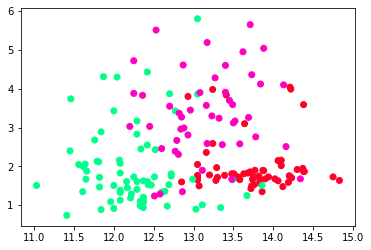

In [24]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y.iloc[:,0].apply(pd.to_numeric), cmap='gist_rainbow')
plt.show()

In [48]:
silhouette_coefficients = []

for k in range(2, 30):
    optics_classifier = OPTICS(min_samples=k, xi=0.05, min_cluster_size=0.05)
    optics_classifier.fit(x)
    silhouette_s = silhouette_score(x, optics_classifier.labels_)
    silhouette_coefficients.append(silhouette_s)

In [49]:
silhouette_coefficients

[-0.06802254042628596,
 -0.0324294769342175,
 0.014793965509944341,
 0.02898430021457105,
 0.15896959812567937,
 0.20777332570135243,
 0.13388100829391608,
 0.1674665083196317,
 0.07671760645341036,
 0.05620121277199009,
 0.07314995395943649,
 0.08708464008252607,
 0.10103093917244821,
 0.03124482279085767,
 0.04071027144704288,
 0.29513496580417903,
 0.04892013967179398,
 0.17754549420154764,
 -0.0713241859710225,
 -0.053812829677939614,
 0.04607072357647454,
 0.1740350654129463,
 0.16088658070975934,
 0.09603509953945209,
 0.09603509953945209,
 0.09603509953945209,
 -0.05308366993417513,
 0.22486325449546446]

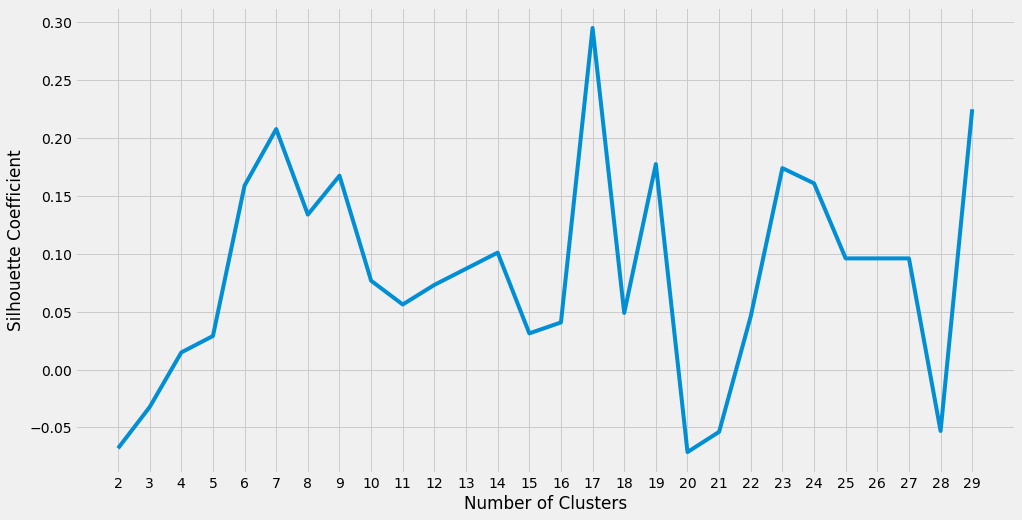

In [54]:
plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [55]:
optics_classifier = OPTICS(min_samples=17, xi=0.05, min_cluster_size=0.05)
optics_classifier.fit(x)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=17, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [56]:
optics_classifier.labels_

array([ 0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
        0, -1, -1,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  0,  0, -1,  0,
       -1, -1, -1,  0,  0,  0, -1, -1,  2,  1,  2,  1,  2,  2,  1,  2,  2,
       -1, -1, -1,  2,  2,  0, -1,  2,  2,  2, -1,  2, -1, -1,  1,  2,  2,
        2,  2,  1,  1,  1,  2,  2,  2, -1,  2, -1,  1,  2,  1,  2,  1,  1,
        2,  2,  1, -1,  2,  2, -1,  1,  1, -1,  1,  2,  2,  2,  2,  2,  2,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  2,  1,  1,  1,  1,
        1,  2,  1,  1,  1, -1,  2,  2, -1, -1,  2,  1,  1,  2,  2,  2,  2,
        1,  1,  1,  2, -1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1, -1,  1,
        2,  2,  1,  1,  2, -1, -1,  1])

In [57]:
optics_classifier.reachability_

array([         inf,  59.45622844,  77.6620538 , 140.3062422 ,
        65.79366003, 132.03050367,  94.74101857,  94.74101857,
        59.45622844,  59.45622844, 140.3062422 ,  91.27391906,
        95.32477537,  60.23891516, 172.57863048,  94.74101857,
        91.27391906,  60.23891516, 210.30197526,  81.35850847,
        76.3840952 ,  53.64140378,  59.45622844,  59.45622844,
        60.24510354,  60.24510354,  78.59144737,  91.27391906,
        75.10124766,  59.45622844,  91.27391906, 140.3062422 ,
        60.08828505,  91.27391906,  59.45622844,  75.10124766,
        71.15980958,  59.45622844,  59.45622844,  53.64140378,
        55.83501858,  59.45622844,  59.45622844,  41.44394286,
        71.15980958,  59.45622844,  59.45622844,  60.08828505,
        56.98874713,  91.27391906,  60.23891516,  91.27391906,
        77.6620538 ,  96.90569952,  56.98874713,  56.98874713,
        61.57533191,  91.27391906,  91.27391906,  32.4879747 ,
        32.56085073,  32.39670199,  30.75678462,  35.02

In [58]:
optics_classifier.core_distances_

array([ 59.45622844,  60.44373996, 100.08365551, 210.30197526,
        53.64140378, 185.89176878, 105.2114623 , 111.82768083,
        60.18346284,  60.08828505, 240.02503515,  97.09799586,
       132.03050367, 100.44139585, 277.05156397, 125.51170941,
        96.90569952,  86.78504307, 410.05489937,  76.3840952 ,
        65.79366003,  64.26113833,  60.73333269,  67.02339219,
        75.12737118,  71.15980958,  91.27391906, 100.29365932,
        81.35850847,  61.69736299, 100.08365551, 245.04590998,
        75.10124766,  94.74101857,  61.69736299,  87.56736435,
        90.38920455,  70.1012803 ,  61.57533191,  68.20825243,
        60.24510354,  63.28181729,  60.23891516,  32.56085073,
        90.56681511,  61.57533191,  56.98874713,  77.79335126,
        61.4202027 , 111.2905252 , 100.38228131, 111.99340025,
        95.54718259, 140.3062422 ,  60.1823529 ,  77.6620538 ,
        85.92779993, 105.80466625, 100.28126096,  32.21058677,
        32.32175738,  35.74121431,  32.49943384,  40.42

In [40]:
pred_result = pd.DataFrame(data=optics_classifier.labels_,
          index=np.array(range(1, 179)),
          columns=np.array(range(1, 2)))

In [59]:
adjusted_rand_score(y.iloc[:,0], optics_classifier.labels_)

0.2648865239721819

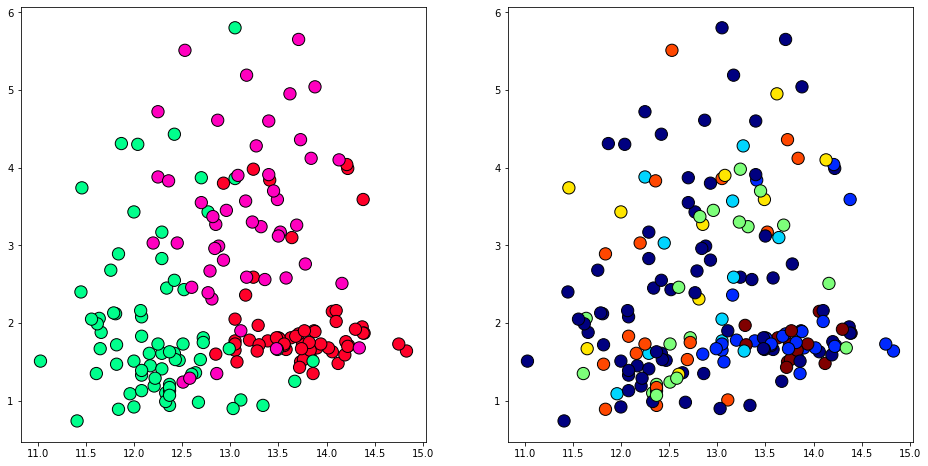

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x.iloc[:, 0], x.iloc[:, 1], c=y.iloc[:,0].apply(pd.to_numeric), cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred_result.iloc[:,0].apply(pd.to_numeric), cmap='jet',edgecolor='k', s=150)
plt.show()